**Q2. Classify the email using the binary classification method. Email Spam detection has two states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors and Support Vector Machine for classification. Analyze their performance. Dataset link: The emails.csv dataset on the Kaggle https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Pre-processing

In [3]:
df = pd.read_csv("emails.csv")

In [4]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [7]:
df.isnull().any().sum()  # prints no. of columns that have null/nan values

0

In [9]:
x = df.drop(['Email No.', 'Prediction'], axis=1)
y = df['Prediction']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [10]:
print("Number of samples in 'text':", x_train.shape[0])
print("Number of samples in 'label':", y_train.shape[0])

Number of samples in 'text': 3620
Number of samples in 'label': 3620


### KNN - Finding the best K value

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}
knn = KNeighborsClassifier()

In [12]:
# using 5-fold cross validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15]})

In [13]:
best_knn = grid_search.best_estimator_  # gives the best trained knn
bestk = grid_search.best_params_['n_neighbors']  # gives best k value
bestk

7

In [14]:
ypred = best_knn.predict(x_test)

In [15]:
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Metrics

In [19]:
cm = confusion_matrix(y_test, ypred)
cm

array([[965, 125],
       [103, 359]], dtype=int64)

<AxesSubplot:>

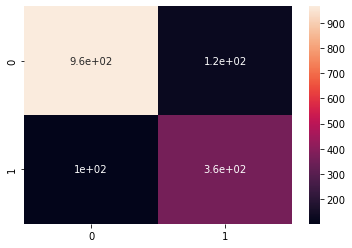

In [20]:
sns.heatmap(cm, annot=True)

In [21]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1090
           1       0.74      0.78      0.76       462

    accuracy                           0.85      1552
   macro avg       0.82      0.83      0.83      1552
weighted avg       0.86      0.85      0.85      1552



### SVM

In [33]:
svm = SVC(kernel = 'linear')
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [34]:
ypred = svm.predict(x_test)

### Metrics

In [35]:
cm = confusion_matrix(y_test, ypred)
cm

array([[1057,   33],
       [  24,  438]], dtype=int64)

<AxesSubplot:>

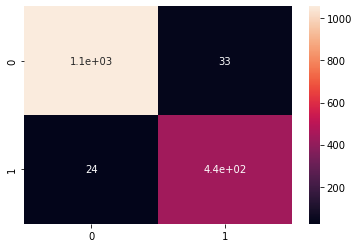

In [36]:
sns.heatmap(cm, annot=True)

In [37]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1090
           1       0.93      0.95      0.94       462

    accuracy                           0.96      1552
   macro avg       0.95      0.96      0.96      1552
weighted avg       0.96      0.96      0.96      1552

